# MNIST Classification

<img src="https://i.ytimg.com/vi/6xar6bxD80g/maxresdefault.jpg" width=650>

## 1. Import Necessary Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = load_digits()

In [3]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
len(data.target)

1797

In [5]:
len(data.images)

1797

In [6]:
data.target[0]

0

In [7]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

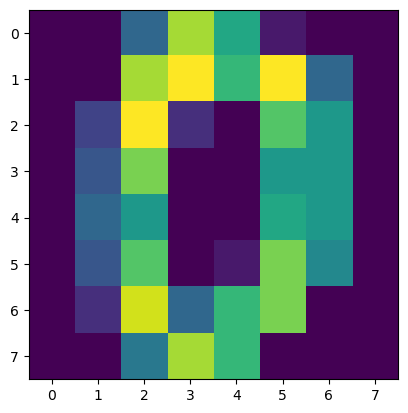

In [8]:
plt.subplot()
plt.imshow(data.images[0])

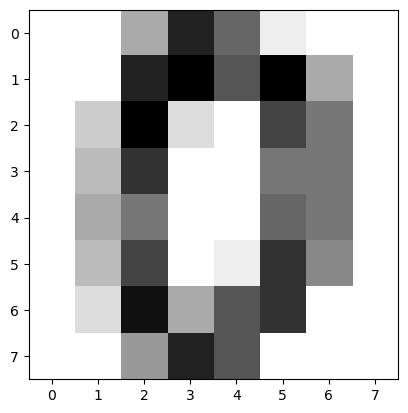

In [9]:
plt.subplot()
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [10]:
data.target[0]

0

In [11]:
images_and_labels = list(zip(data.images, data.target))

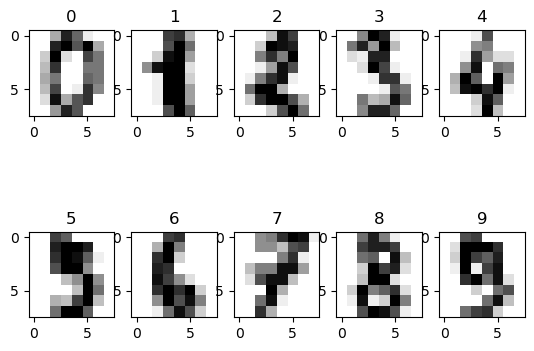

In [12]:
for i, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2,5, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [13]:
np.shape(data.images)

(1797, 8, 8)

In [14]:
X = data.images.reshape(1797,-1)
y = data.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [16]:
np.shape(X)

(1797, 64)

In [17]:
np.shape(y)

(1797,)

# <img src="https://cdn-icons-png.flaticon.com/512/2083/2083213.png" width=40> Model

In [30]:
# ada_clf = AdaBoostClassifier(n_estimators=20)
ada_clf = AdaBoostClassifier(base_estimator=SVC(probability=True, kernel='rbf'), n_estimators=100)

In [31]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=SVC(probability=True), n_estimators=100)

In [32]:
y_pred = ada_clf.predict(X_test)

# <img src="https://cdn-icons-png.flaticon.com/512/1484/1484635.png" width=40> Model Evaluation 

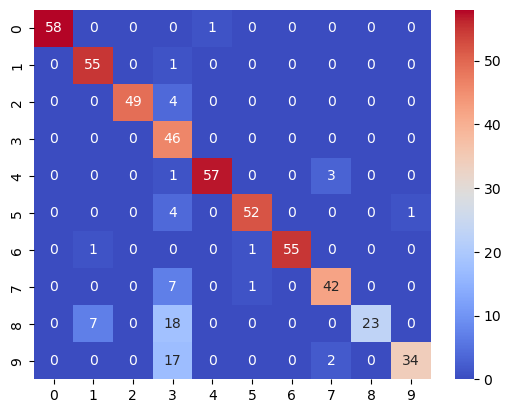

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='coolwarm', annot=True)
plt.show()

In [34]:
accuracy_score(y_test, y_pred)

0.8722222222222222

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.87      0.98      0.92        56
           2       1.00      0.92      0.96        53
           3       0.47      1.00      0.64        46
           4       0.98      0.93      0.96        61
           5       0.96      0.91      0.94        57
           6       1.00      0.96      0.98        57
           7       0.89      0.84      0.87        50
           8       1.00      0.48      0.65        48
           9       0.97      0.64      0.77        53

    accuracy                           0.87       540
   macro avg       0.92      0.87      0.87       540
weighted avg       0.92      0.87      0.88       540

